# Background

In this NLP project I have attempted to classify Yelp Reviews into 1 star or 5 star categories based on the text content in the reviews.

- We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. 
- All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

# Part 1: Importing libraries and the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
%matplotlib inline

In [3]:
yelp = pd.read_csv('yelp.csv')

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


# Part 2: Exploratory Data Analysis

In [7]:
#Creating a new column of text length for exploration
yelp['text length'] = yelp['text'].apply(len)

In [8]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


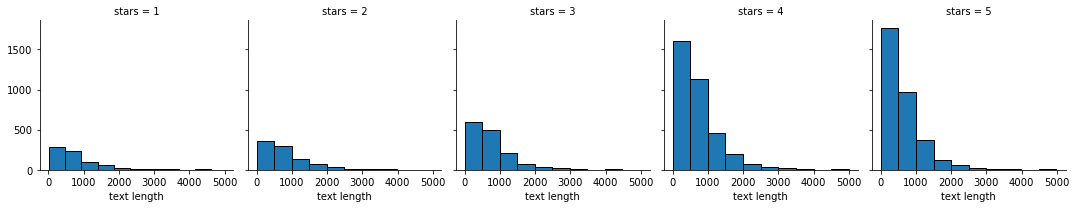

In [12]:
g = sns.FacetGrid(data=yelp,col='stars')
g = g.map(plt.hist,'text length',bins=10,edgecolor='black')

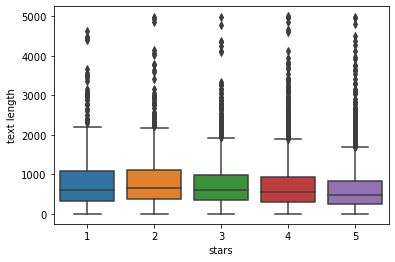

In [13]:
sns.boxplot(x='stars',y='text length',data=yelp)

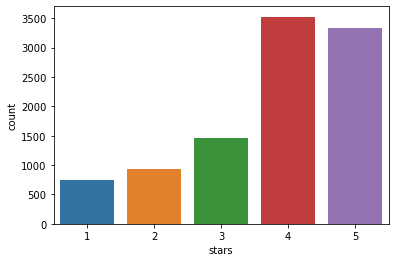

In [14]:
sns.countplot(x='stars',data=yelp)

In [15]:
yelp.groupby(by='stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [17]:
yelp.groupby(by='stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


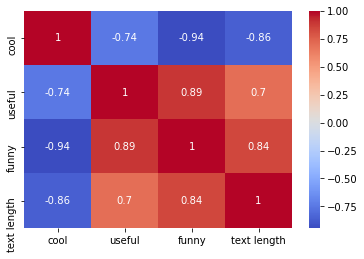

In [21]:
sns.heatmap(yelp.groupby(by='stars').mean().corr(),cmap='coolwarm',annot=True)

# Part 3: Creating feature and predictor matrices

In [35]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [43]:
yelp_class['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

**Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [44]:
X = yelp_class['text']
y = yelp_class['stars']

# Part 4: Vectorization

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [48]:
X = cv.fit_transform(X)

# Part 5: Training the model

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [55]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
nb.fit(X_train,y_train)

MultinomialNB()

In [59]:
nb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

# Part 6: Predicting the results

In [60]:
y_pred = nb.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
print(confusion_matrix(y_test,y_pred),
     classification_report(y_test,y_pred))

[[159  69]
 [ 22 976]]               precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



# Part 7: Building a pipeline

In [65]:
from sklearn.pipeline import Pipeline

Let us include TfidfTransformer in the pre-processing phase and see if the results improve

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer

In [75]:
pipeline = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('tfdiftransformer',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

# Part 8: Implementing and evaluating the pipeline results

This pipeline has all the pre-process steps in it already, meaning we'll need to re-split the original data (since we overwrote X as the CountVectorized version. What we need is just the text)

In [76]:
X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [77]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfdiftransformer', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

In [78]:
y_pred = pipeline.predict(X_test)

In [79]:
print(confusion_matrix(y_test,y_pred),
     classification_report(y_test,y_pred))

[[  0 228]
 [  0 998]]               precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looks like Tf-Idf actually made things worse! So for implemtation we can finally just stick to the pipeline without Tf-Idf transformation.

Note: This analysis was done as a follow along of Udemy course - https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp